Muhammad Ghifari Ramadhani  
JCDSOL-011-ONLINE  
California Housing Prices : https://www.kaggle.com/datasets/camnugent/california-housing-prices

# **1. Problem Understanding**

**Konteks**

Dataset merupakan kumpulan data perumahan di California, Amerika Serikat, yang berasal dari sensus yang dilakukan pada tahun 1990. Dataset tersebut berisikan data-data demography (income,populasi,house occupancy), lokasi area (longitude,latitude) dan informasi general terkait perumahan pada daerah tersebut (number of rooms, number of bedrooms, house age).

**Pernyataan Masalah**


Tantangan dari setiap developer perumahan adalah bagaimana menentukan harga perumahan yang tepat serta dimana lokasi untuk membangun perumahan agar tidak salah sasaran ketika menentukan harga dan lokasi perumahannya. developer tentu saja tidak ingin membangun perumahan elit di kawasan yang notabene warga sekitarnya berpenghasilan rendah, atau membangun perumahan yang biasa saja di kawasan elit. Hal ini tentu saja akan berdampak dari penjualan properti rumah tersebut.

**Tujuan**

Untuk menentukan harga jual suatu rumah di daerah California berdasarkan fitur-fitur yang ada. Terdapat berbagai perbedaan fitur pada suatu properti, seperti jumlah kamar, lokasinya, median income yang dapat membedakan harga jual secara prediksi, yang mana dapat mendatangkan profit bagi setiap developer rumahan yang juga sesuai dengan target marketing developer tersebut.

**Analytic Approach**


Analisis data sangat penting dan akan dilakukan karena untuk dapat menemukan pola-pola dari fitur yang ada yang membedakan properti-propertinya.  
  
Selanjutnya, suatu model regresi akan dibangun yang akan membantu perusahaan untuk dapat menyediakan alat prediksi harga jual rumah yang baru yang akan berguna untuk menentukan harga jual suatu rumah pada daerah tersebut.

**Metrics Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan.

# **2. Data Understanding**

1. **Longitude**        : A measure of how far west a house is; a higher value is farther west
2. **Latitude**         : A measure of how far north a house is; a higher value is farther north
3. **housingMedianAge** : Median age of a house within a block; a lower number is a newer building
4. **totalRooms**       : Total number of rooms within a block
5. **totalBedrooms**    : Total number of bedrooms within a block
6. **population**       : Total number of people residing within a block
7. **households**       : Total number of households, a group of people residing within a home unit, for a block
8. **medianIncome**     : Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. **medianHouseValue** : Median house value for households within a block (measured in US Dollars)
10. **oceanProximity**  : Location of the house

In [7]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Load Dataset
df=pd.read_csv('data_california_house.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [10]:
# Duplikat data agar tidak terjadi perubahan pada yang original
df_model = df.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

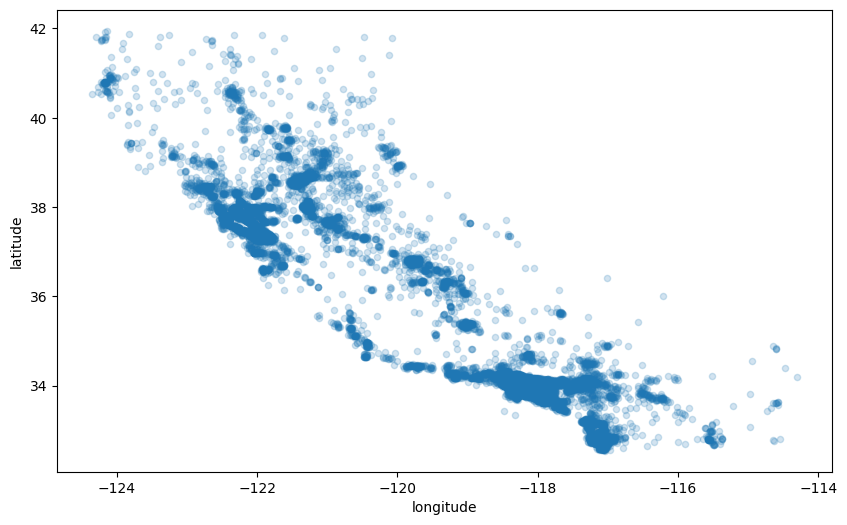

In [11]:
# Melihat lokasi tiap rumah berdasarkan latitude dan longitude
df_model.plot(x='longitude', y='latitude',kind='scatter',alpha=0.2, figsize=(10,6))

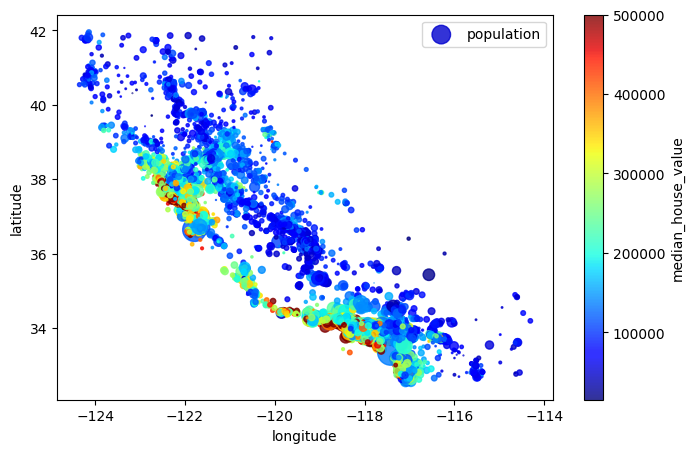

In [12]:
# Melihat lokasi rumah yang memiliki tingkat penjualan paling banyak
df_model.plot(kind="scatter", x="longitude", y="latitude", alpha=0.8,
 s=df_model["population"]/100, label="population", figsize=(8,5),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

<Axes: xlabel='ocean_proximity', ylabel='count'>

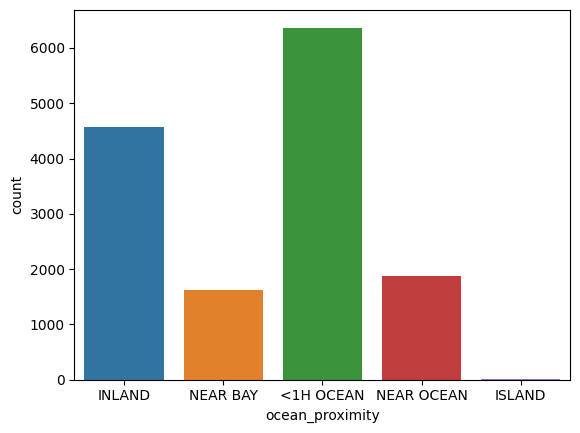

In [13]:
# Melihat tingkat penjualan tertinggi menggunakan countplot
sns.countplot(data=df_model,x='ocean_proximity')

In [14]:
df_model.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# **3. Data Preprocessing**

Tahap ini akan dilakukan pengecekan terhadap data yang meliputi **Distribusi Data, Missing Value, Duplicate Data, dan Outliers**

In [15]:
# Cek detail dari data
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'null%', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,null%,unique,uniqueSample
0,longitude,float64,0,0.00,806,"[-123.8, -117.16]"
1,latitude,float64,0,0.00,836,"[37.99, 39.86]"
2,housing_median_age,float64,0,0.00,52,"[4.0, 9.0]"
3,total_rooms,float64,0,0.00,5227,"[1785.0, 561.0]"
4,total_bedrooms,float64,137,0.95,1748,"[1490.0, 562.0]"
5,population,float64,0,0.00,3498,"[2551.0, 2917.0]"
6,households,float64,0,0.00,1649,"[578.0, 1213.0]"
7,median_income,float64,0,0.00,9797,"[6.3013, 1.505]"
8,ocean_proximity,object,0,0.00,5,"[NEAR OCEAN, ISLAND]"
9,median_house_value,float64,0,0.00,3548,"[377200.0, 174400.0]"


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

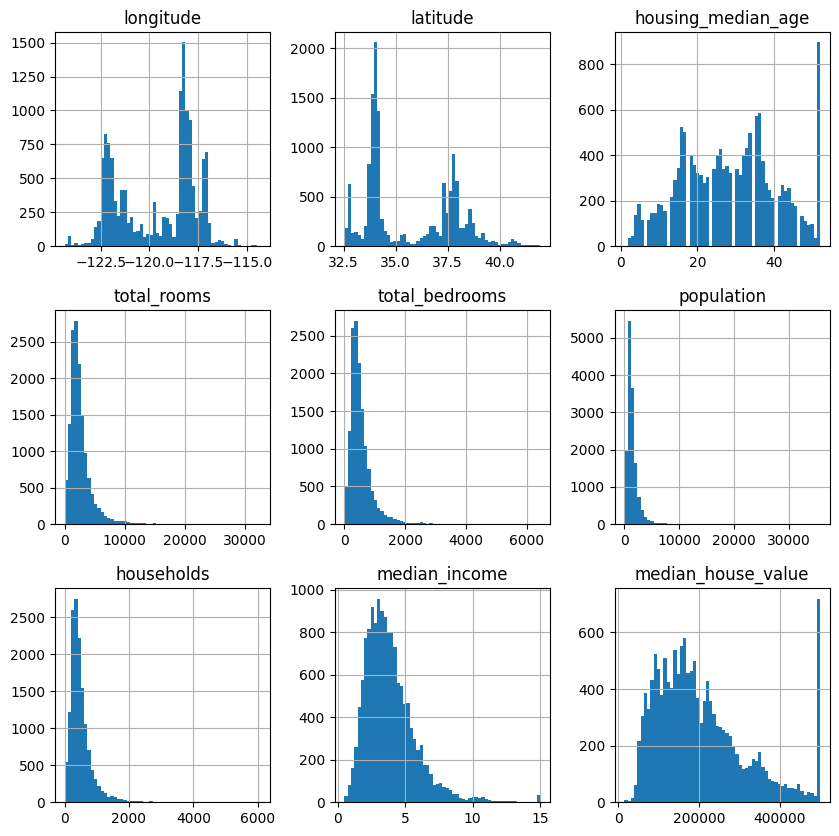

In [16]:
# Distribusi Data
df_model.hist(bins=60,figsize=(10,10))

Terlihat dari distribusi data tersebut bahwa fitur-fitur yang ada memiliki distribusi tidak normal yang cukup banyak. Outlier terlihat cukup banyak pada bagian housingMedianAge dan medianHouseValue. Distribusi tidak normal akan diubah menjadi distribusi normal dengan cara mengubah skalanya menjadi logaritmik dengan sklearn powertransformer.

In [17]:
# Cek Missing Values
df_model.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [18]:
col_with_missing = [col for col in df_model.columns if df_model[col].isnull().any()]

In [19]:
df_model[df_model['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
88,-121.47,38.61,31.0,1072.0,NaN,781.0,281.0,1.6563,INLAND,65800.0
119,-117.28,34.26,18.0,3895.0,NaN,1086.0,375.0,3.3672,INLAND,133600.0
251,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,INLAND,158700.0
340,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,146500.0
410,-122.42,40.44,16.0,994.0,NaN,495.0,181.0,2.1875,INLAND,76400.0
...,...,...,...,...,...,...,...,...,...,...
13856,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN,150400.0
13932,-117.87,33.83,27.0,2287.0,NaN,1140.0,351.0,5.6163,<1H OCEAN,231000.0
13989,-118.40,34.17,24.0,6347.0,NaN,2945.0,1492.0,3.3545,<1H OCEAN,221500.0
14308,-118.55,34.19,18.0,5862.0,NaN,3161.0,1280.0,3.1106,<1H OCEAN,170600.0


In [20]:
#Cek Duplicate Data
df_model.duplicated().sum()

0

<Axes: >

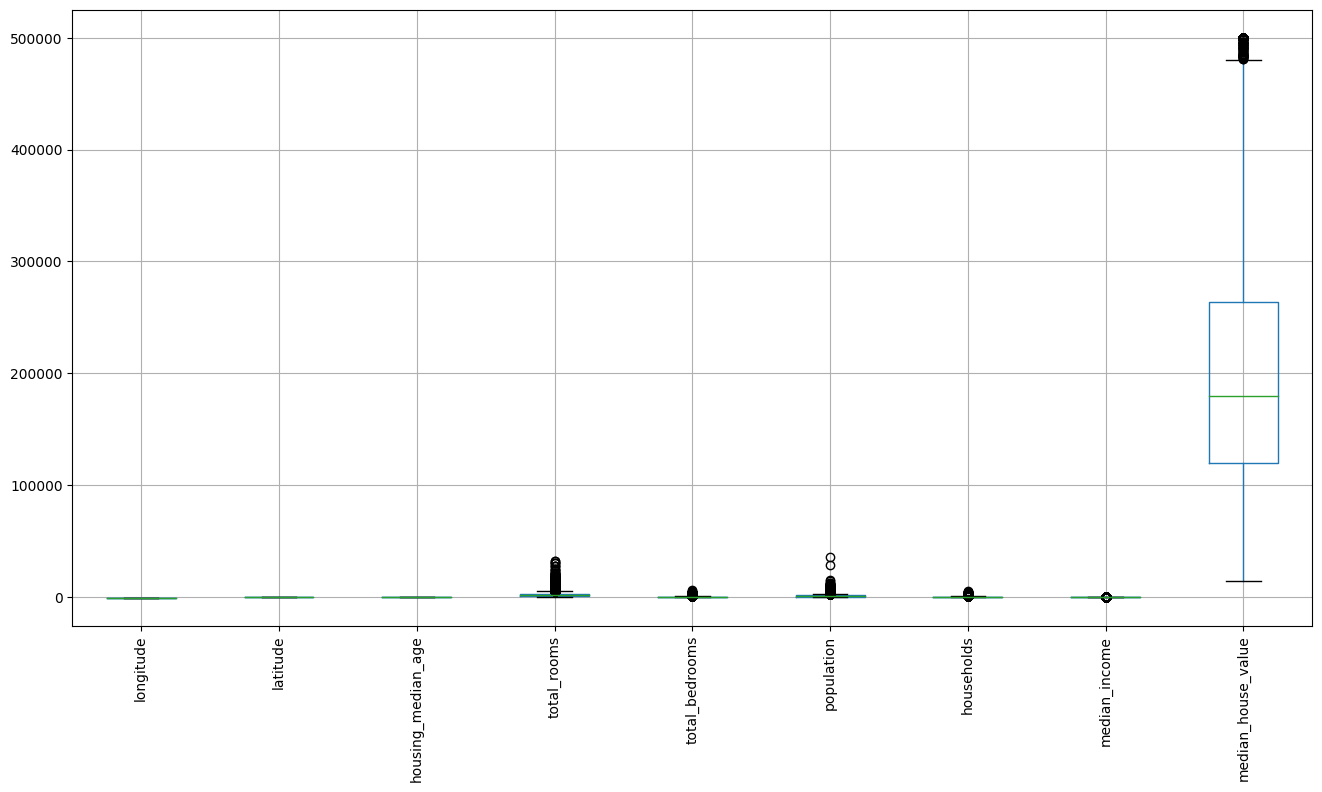

In [21]:
plt.figure(figsize=(16,8))
df.boxplot(rot=90)

Outlier yang memiliki nilai paling tinggi yang hanya akan dihilangkan, karena jika semua outlier dihilangkan, maka data akan tersisa sedikit. Terlihat 2 kolom yang memiliki outlier paling tinggi, yaitu housingMedianAge dan medianHouseValue.

<Axes: xlabel='median_house_value', ylabel='Density'>

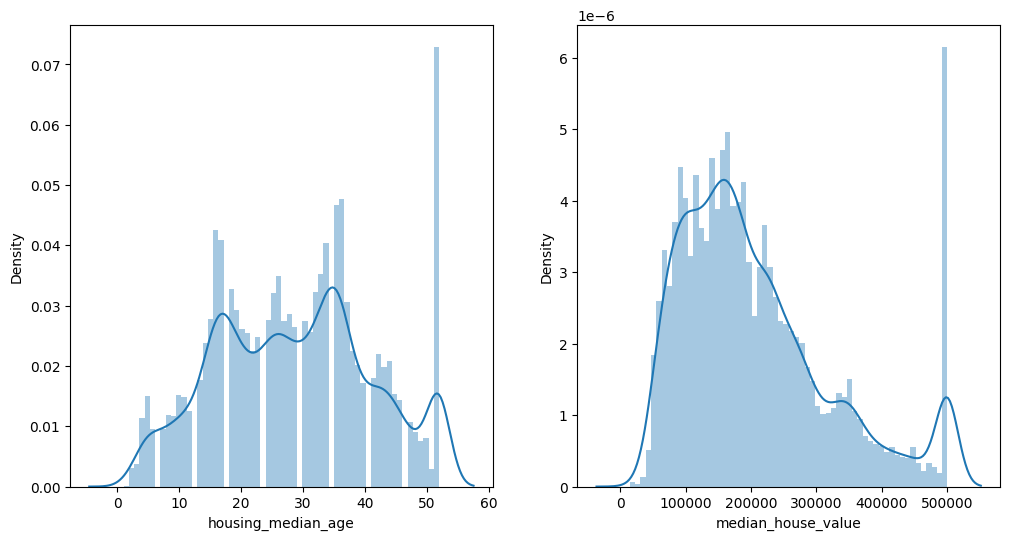

In [22]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(df['housing_median_age'],bins=60)

plt.subplot(1,2,2)
sns.distplot(df['median_house_value'],bins=60)

In [23]:
# Fungsi Untuk Cek Outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')

<Axes: >

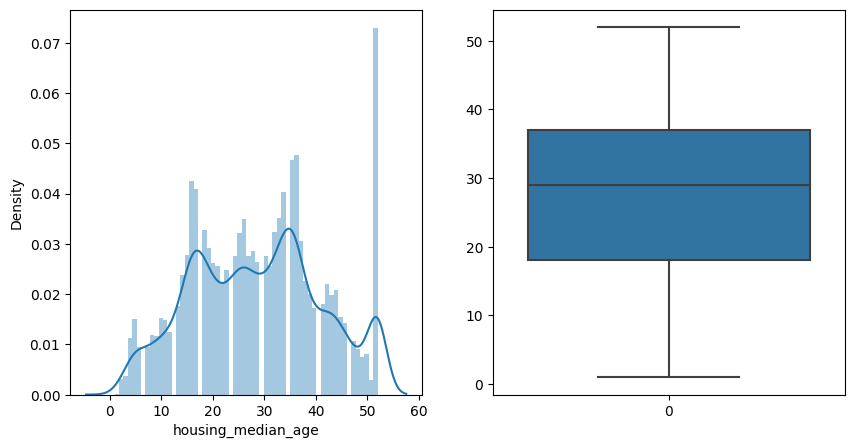

In [24]:
# Outlier HousingMedianAge

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df_model['housing_median_age'],bins=60)

plt.subplot(1,2,2)
sns.boxplot(df_model['housing_median_age'],)

In [25]:
find_anomalies(df_model['housing_median_age'])

IQR: 19.0
limit_bawah: -10.5
limit_atas: 65.5


In [26]:
pd.DataFrame(df_model['housing_median_age'].describe())

,housing_median_age
count,14448.000000
mean,28.618702
std,12.596694
min,1.000000
25%,18.000000
50%,29.000000
75%,37.000000
max,52.000000


In [27]:
df_model[df_model['housing_median_age']>=45]['housing_median_age'].value_counts().head()

housing_median_age
52.0    896
45.0    189
46.0    176
47.0    132
48.0    111
Name: count, dtype: int64

Nilai 52 terlihat ada 896, oleh karena itu akan dihilangkan agar tidak terjadi bias.

In [28]:
# Hapus Outlier HousingMedianAge

df_model = df_model.drop(df_model[df_model['housing_median_age']==52].index)
df_model

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


<Axes: xlabel='median_house_value', ylabel='Density'>

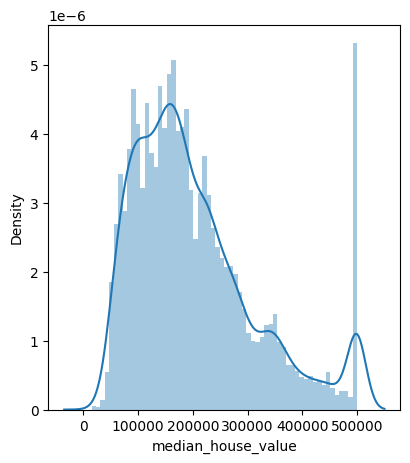

In [29]:
# Outlier MedianHouseValue

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df_model['median_house_value'],bins=60)

In [30]:
pd.DataFrame(df_model['median_house_value'].describe())

,median_house_value
count,13552.000000
mean,202258.681302
std,112074.451189
min,14999.000000
25%,118300.000000
50%,176750.000000
75%,256150.000000
max,500001.000000


In [31]:
df_model[df_model['median_house_value']>450000]['median_house_value'].value_counts().head()

median_house_value
500001.0    552
500000.0     10
475000.0      5
483300.0      5
450400.0      3
Name: count, dtype: int64

500001 berjumlah 552, oleh karena itu akan dihilangkan juga seperti outlier sebelumnya.

In [32]:
df_model = df_model.drop(df_model[df_model['median_house_value']==500001.0].index)  
df_model

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [33]:
pd.DataFrame(df_model['median_house_value'].describe())

,median_house_value
count,13000.000000
mean,189616.084385
std,95758.531185
min,14999.000000
25%,115675.000000
50%,171600.000000
75%,243100.000000
max,500000.000000


## **Penambahan Feature**

Akan ditambahkan feature roomsPerHousehold, bedroomsPerRoom, dan populationPerHousehold.

In [34]:
df_model["rooms_per_household"] = df_model["total_rooms"]/df_model["households"]

df_model["bedrooms_per_room"] = df_model["total_bedrooms"]/df_model["total_rooms"]

df_model["population_per_household"]=df_model["population"]/df_model["households"]

df_model

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,3.671480,0.322517,3.018051
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,6.478022,0.167939,3.810440
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,2.518000,0.474980,3.051000
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,4.622754,0.251295,3.628743
5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0,6.495068,0.153773,2.718249
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0,6.000000,0.174277,3.251142
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0,5.349282,0.174419,3.095694
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0,3.641221,NaN,1.791349
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0,4.540598,0.234353,2.247863


In [35]:
df_model.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
longitude,13000.0,NaN,NaN,NaN,-119.475048,1.979977,-124.3,-121.53,-118.445,-117.97,-114.31
latitude,13000.0,NaN,NaN,NaN,35.585548,2.14951,32.54,33.92,34.24,37.67,41.95
housing_median_age,13000.0,NaN,NaN,NaN,26.955615,11.425619,1.0,17.0,27.0,36.0,51.0
total_rooms,13000.0,NaN,NaN,NaN,2672.960308,2230.543012,2.0,1458.0,2143.0,3184.0,32627.0
total_bedrooms,12873.0,NaN,NaN,NaN,548.897615,433.255534,2.0,299.0,442.0,661.0,6445.0
population,13000.0,NaN,NaN,NaN,1469.816231,1180.573084,3.0,808.0,1203.0,1778.25,35682.0
households,13000.0,NaN,NaN,NaN,509.058385,391.662972,2.0,283.0,416.0,615.0,6082.0
median_income,13000.0,NaN,NaN,NaN,3.689501,1.561164,0.4999,2.54295,3.475,4.60565,15.0001
ocean_proximity,13000,5,<1H OCEAN,5818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
median_house_value,13000.0,NaN,NaN,NaN,189616.084385,95758.531185,14999.0,115675.0,171600.0,243100.0,500000.0


In [36]:
df_model.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              127
population                    0
households                    0
median_income                 0
ocean_proximity               0
median_house_value            0
rooms_per_household           0
bedrooms_per_room           127
population_per_household      0
dtype: int64

Terlihat bahwa sekarang feature bedroomsPerRoom terdapat missing values yang mana akan diatasi menggunakan iterative imputer.

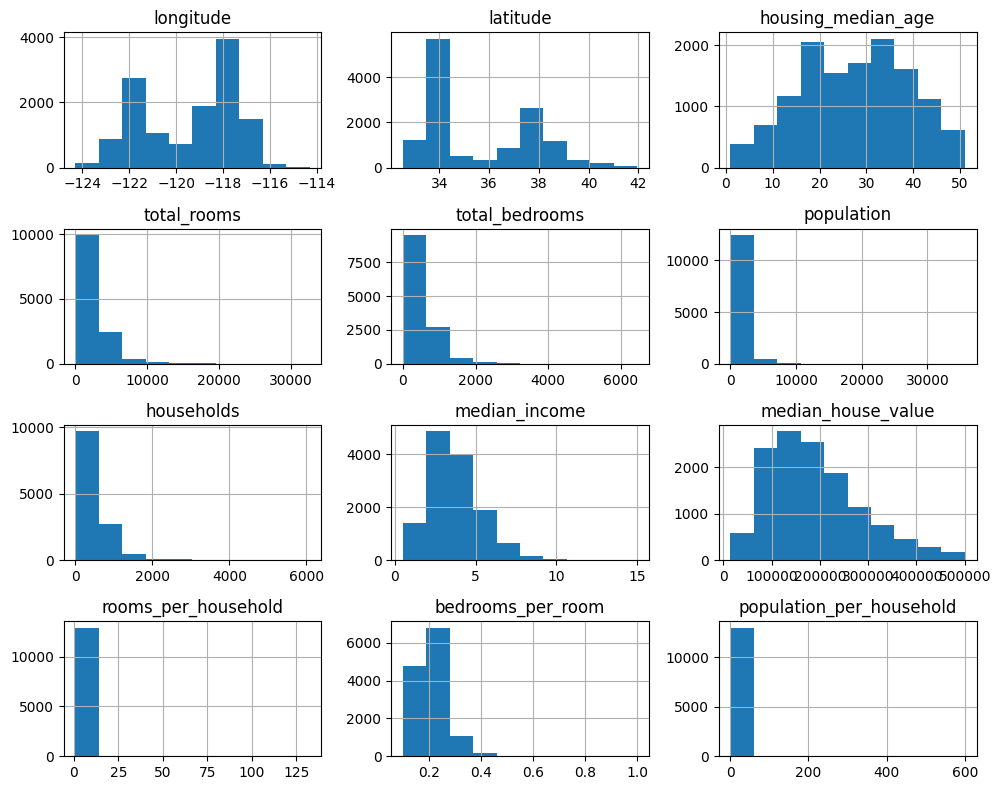

In [37]:
df_model.hist(figsize=(10,8))
plt.tight_layout()

**Feature Engineering**

Target : Median House Value  
**Categorical Data** :  
OneHotEncoding : OceanProximity  
**Numerical Data** :   
- Iterative Imputer : Total Bedrooms, BedroomsPerRoom
- PowerTransformer  : housingMedianAge, totalRooms, totalBedrooms, Population, household, medianIncome, roomsPerHousehold, bedroomsPerRoom, PopulationPerHousehold
- Passthrough       : Longitude,Latitude

In [38]:
df_model

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,3.671480,0.322517,3.018051
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,6.478022,0.167939,3.810440
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,2.518000,0.474980,3.051000
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,4.622754,0.251295,3.628743
5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0,6.495068,0.153773,2.718249
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0,6.000000,0.174277,3.251142
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0,5.349282,0.174419,3.095694
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0,3.641221,NaN,1.791349
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0,4.540598,0.234353,2.247863


In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [40]:
categorical_col = ['ocean_proximity']
scale_col = [
'housing_median_age',
'total_rooms',
'population',
'households',
'median_income',
'rooms_per_household',
'population_per_household' 
 ]


onehot = OneHotEncoder(drop='first', handle_unknown='ignore')

numerical_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer()),
    ('scaler',PowerTransformer(method='box-cox'))
])

transformer = ColumnTransformer([
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_col),
        ('imp_scal', numerical_transformer, ['total_bedrooms', 'bedrooms_per_room']),
        ('scaler', PowerTransformer(method='box-cox'),scale_col)
],remainder='passthrough')

**Data Splitting**

In [41]:
X = df_model.drop(['median_house_value'],axis=1)
y = df_model['median_house_value']

**Train/Test Splitting**

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

**Cross Validation**

In [45]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [46]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-54502.06261691 -56556.79806833 -59045.9397236  -59104.17592808
 -58653.70421042] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-38583.04338474 -39649.41064554 -40265.95809287 -40666.57788561
 -41081.92986133] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.22640838 -0.2252067  -0.22129272 -0.23978902 -0.23640676] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-50829.34424109 -52916.5875381  -52799.77362076 -52372.71225656
 -53490.69063483] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-34361.1952596  -35735.11961722 -35278.49888771 -34641.76369293
 -35783.05093181] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,


In [48]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-57572.536109,1796.958232,-40049.383974,872.251921,-0.229821,0.007048
1,KNN Regressor,-52481.821658,900.057544,-35159.925678,572.652579,-0.194730,0.003007
2,DecisionTree Regressor,-65987.792243,2767.298497,-44266.253077,1480.873337,-0.253413,0.010092
3,RandomForest Regressor,-46950.506516,1837.933128,-30896.973379,842.435447,-0.171603,0.005396
4,XGBoost Regressor,-44731.760018,1584.002145,-29179.654519,793.353325,-0.162307,0.002324


In [49]:
from sklearn.model_selection import cross_validate

lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)


log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)


linreg_pipe = Pipeline([('transformer', transformer), ('linreg', log_lr)])
knn_pipe = Pipeline([('transformer', transformer), ('knn', log_knn)])
dt_pipe = Pipeline([('transformer', transformer), ('dt', log_dt)]) 
rf_pipe = Pipeline([('transformer', transformer), ('rf', log_rf)])
xgb_pipe = Pipeline([('transformer', transformer), ('xgboost', log_xgb)])

metric = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error',]

def model_evaluation(model, metric):
    model_cv = cross_validate(model, X_train, y_train, cv = KFold(n_splits=5, shuffle=True, random_state=1), scoring = metric, return_train_score=True)
    return model_cv

linreg_pipe_cv_score = model_evaluation(linreg_pipe, metric)
knn_pipe_cv_score = model_evaluation(knn_pipe, metric)
dt_pipe_cv_score = model_evaluation (dt_pipe, metric)
rf_pipe_cv_score = model_evaluation(rf_pipe, metric)
xgb_pipe_cv_score = model_evaluation(xgb_pipe, metric)

Root Mean Square Error (RMSE), Mean Square Error (MSE), Mean Absolute Error (MAE) akan digunakan untuk mengukur kinerja dari suatu algoritma dalam masalah regresi. Dalam model regresi, untuk mengetahui keakuratan kinerja model suatu algoritma, kita dapat mengambilnya dari nilai yang memiliki kesalahan kecil. Dengan kata lain, semakin kecil nilai error yang dihasilkan, maka semakin dekat nilai atau jarak antara nilai aktual dan prediksi.

In [50]:
# RMSE

algo = ['Lin-Reg','KNN','DT','RF','XGB']
scorecv = [linreg_pipe_cv_score,knn_pipe_cv_score,dt_pipe_cv_score,rf_pipe_cv_score,xgb_pipe_cv_score]
scorecrossval = []
scoremeancrossval = []
scorestdcorssval = []
for j in scorecv:
    scorecrossvalresult = -1 * j['test_neg_root_mean_squared_error'].round(5)
    scoremeancrossvalresult = -1 * j['test_neg_root_mean_squared_error'].mean().round(5)
    scorestdcorssvalresult = j['test_neg_root_mean_squared_error'].std().round(5)

    scorecrossval.append(scorecrossvalresult)
    scoremeancrossval.append(scoremeancrossvalresult)
    scorestdcorssval.append(scorestdcorssvalresult)


pd.set_option('display.max_colwidth',None)
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'CV_RMSE': scorecrossval,
    'Mean_RMSE': scoremeancrossval,
    'Std_RMSE': scorestdcorssval
})

,Model,CV_RMSE,Mean_RMSE,Std_RMSE
0,Linear Regression,"[54502.06262, 56556.79807, 59045.93972, 59104.17593, 58653.70421]",57572.53611,1796.95823
1,KNN Regressor,"[50829.34424, 52916.58754, 52799.77362, 52372.71226, 53490.69063]",52481.82166,900.05754
2,DecisionTree Regressor,"[67011.2512, 62253.25906, 69360.40491, 63238.12185, 68075.92419]",65987.79224,2767.29850
3,RandomForest Regressor,"[44068.59927, 45710.45069, 48906.79212, 47372.00939, 48694.68112]",46950.50652,1837.93313
4,XGBoost Regressor,"[41984.9791, 44010.56572, 46421.89222, 45473.24065, 45768.1224]",44731.76002,1584.00215


Berdasarkan RMSE, XGBoost memiliki nilai paling baik jika dilihat dari rata-ratanya diikuti randomforest.

In [51]:
# MAE

scorecv = [linreg_pipe_cv_score,knn_pipe_cv_score,dt_pipe_cv_score,rf_pipe_cv_score,xgb_pipe_cv_score]
scorecrossval = []
scoremeancrossval = []
scorestdcorssval = []
for j in scorecv:
    scorecrossvalresult = -1 * j['test_neg_mean_absolute_error'].round(5)
    scoremeancrossvalresult = -1 * j['test_neg_mean_absolute_error'].mean().round(5)
    scorestdcorssvalresult = j['test_neg_mean_absolute_error'].std().round(5)

    scorecrossval.append(scorecrossvalresult)
    scoremeancrossval.append(scoremeancrossvalresult)
    scorestdcorssval.append(scorestdcorssvalresult)


pd.set_option('display.max_colwidth',None)
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'CV_MAE': scorecrossval,
    'Mean_MAE': scoremeancrossval,
    'Std_MAE': scorestdcorssval
})

,Model,CV_MAE,Mean_MAE,Std_MAE
0,Linear Regression,"[38583.04338, 39649.41065, 40265.95809, 40666.57789, 41081.92986]",40049.38397,872.25192
1,KNN Regressor,"[34361.19526, 35735.11962, 35278.49889, 34641.76369, 35783.05093]",35159.92568,572.65258
2,DecisionTree Regressor,"[44474.4511, 42575.05495, 45932.96703, 42551.64835, 45797.14396]",44266.25308,1480.87334
3,RandomForest Regressor,"[29652.00723, 30712.12159, 31400.04749, 30559.76241, 32160.92817]",30896.97338,842.43545
4,XGBoost Regressor,"[27961.92792, 28973.76611, 30054.60293, 28859.9562, 30048.01945]",29179.65452,793.35333


Berdasarkan MAE, XGBoost memiliki nilai paling baik jika dilihat dari rata-ratanya diikuti randomforest.

In [52]:
# MAPE

scorecv = [linreg_pipe_cv_score,knn_pipe_cv_score,dt_pipe_cv_score,rf_pipe_cv_score,xgb_pipe_cv_score]
scorecrossval = []
scoremeancrossval = []
scorestdcorssval = []
for j in scorecv:
    scorecrossvalresult = -1 * j['test_neg_mean_absolute_percentage_error'].round(5)
    scoremeancrossvalresult = -1 * j['test_neg_mean_absolute_percentage_error'].mean().round(5)
    scorestdcorssvalresult = j['test_neg_mean_absolute_percentage_error'].std().round(5)

    scorecrossval.append(scorecrossvalresult)
    scoremeancrossval.append(scoremeancrossvalresult)
    scorestdcorssval.append(scorestdcorssvalresult)


pd.set_option('display.max_colwidth',None)
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'CV_MAPE': scorecrossval,
    'Mean_MAPE': scoremeancrossval,
    'Std_MAPE': scorestdcorssval
})

,Model,CV_MAPE,Mean_MAPE,Std_MAPE
0,Linear Regression,"[0.22641, 0.22521, 0.22129, 0.23979, 0.23641]",0.22982,0.00705
1,KNN Regressor,"[0.19301, 0.19628, 0.19014, 0.19519, 0.19904]",0.19473,0.00301
2,DecisionTree Regressor,"[0.26489, 0.24165, 0.25221, 0.24328, 0.26503]",0.25341,0.01009
3,RandomForest Regressor,"[0.17057, 0.16957, 0.1657, 0.17038, 0.1818]",0.17160,0.00540
4,XGBoost Regressor,"[0.16258, 0.16045, 0.16137, 0.16045, 0.16668]",0.16231,0.00232


Berdasarkan MAPE, XGBoost memiliki nilai paling baik jika dilihat dari rata-ratanya diikuti randomforest.

# **4. Data Modeling**

**Predict TestSet Menggunakan XGBoost dan RandomForest**

In [53]:
# Benchmark 2 model terbaik
models = {
    'RandomForest': RandomForestRegressor(random_state=1),
    'XGB': XGBRegressor(random_state=1)
    
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score_rmse.append(np.sqrt(mean_squared_error(y_val, y_pred)))
    score_mae.append(mean_absolute_error(y_val, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_val, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
RandomForest,45802.967266,31176.334790,0.186308
XGB,42874.386374,29242.124414,0.175617


- Setelah dilakukan prediksi pada test set, XGBoost menunjukkan hasil yang lebih baik yang dapat dilihat dari semua metric RMSE, MAE, MAPE.
- Hasil prediksi test set tidak jauh berbeda dengan train set.  
**Training Set** :  
- RMSE : 45149.26993
- MAE  : 29501.86935 
- MAPE : 0.16352   
**Test Set** :
- RMSE  : 43002.353937
- MAE   : 29352.560637
- MAPE  : 0.177021

**Hyperparameter Tuning**

Dikarenakan model XGBoost memiliki performa yang lebih baik dari RandomForest, maka akan digunakan terus sebagai model akhir.

In [54]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [55]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [56]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['ocean_proximity']),
                                                                              ('imp_scal',
                                                                               Pipeline(steps=[('imputer',
                                                                                                IterativeImputer()),
                                                                                               ('scaler',
                                                                                                PowerTransformer(method='box-co...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [57]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,1.359234,0.030072,0.019114,0.001832,0.9,0.059948,119,8,0.05,5,...,703.204149,1,-0.170534,-0.169685,-0.165432,-0.168158,-0.178089,-0.170379,0.004227,1
20,0.334547,0.011576,0.014907,0.000862,0.9,0.007743,143,4,0.38,6,...,569.988752,2,-0.182969,-0.182786,-0.175697,-0.175385,-0.189191,-0.181205,0.005169,2
17,0.606085,0.017787,0.015905,0.001021,0.6,0.001,190,5,0.04,9,...,764.558869,3,-0.181912,-0.182137,-0.175320,-0.179915,-0.189223,-0.181701,0.004488,3
3,1.045427,0.043480,0.024520,0.002496,0.5,0.021544,166,8,0.1,9,...,434.205642,5,-0.195879,-0.192670,-0.188620,-0.191824,-0.198693,-0.193537,0.003462,5
8,0.697409,0.015139,0.021315,0.003240,0.7,0.021544,182,6,0.31,2,...,783.582587,4,-0.192784,-0.186492,-0.192613,-0.191865,-0.192809,-0.191313,0.002435,4


In [58]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -43514.54897455148
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 119, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 5, 'model__colsample_bytree': 0.8}


**Predict ke test set dengan model yang telah di tuning**

In [59]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_val)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_val, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_val, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_val, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,42335.113078,28634.334905,0.170857


**Perbandingan Performa Model XGBoost Sebelum dan Sesudah Dilakukan Hyperparameter Tuning**

In [60]:
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,42874.386374,29242.124414,0.175617


In [61]:
score_after_tuning

,RMSE,MAE,MAPE
XGB,42335.113078,28634.334905,0.170857


Dapat dilihat bahwa model mengalami peningkatan performa dengan dilakukannya hyperparameter tuning.

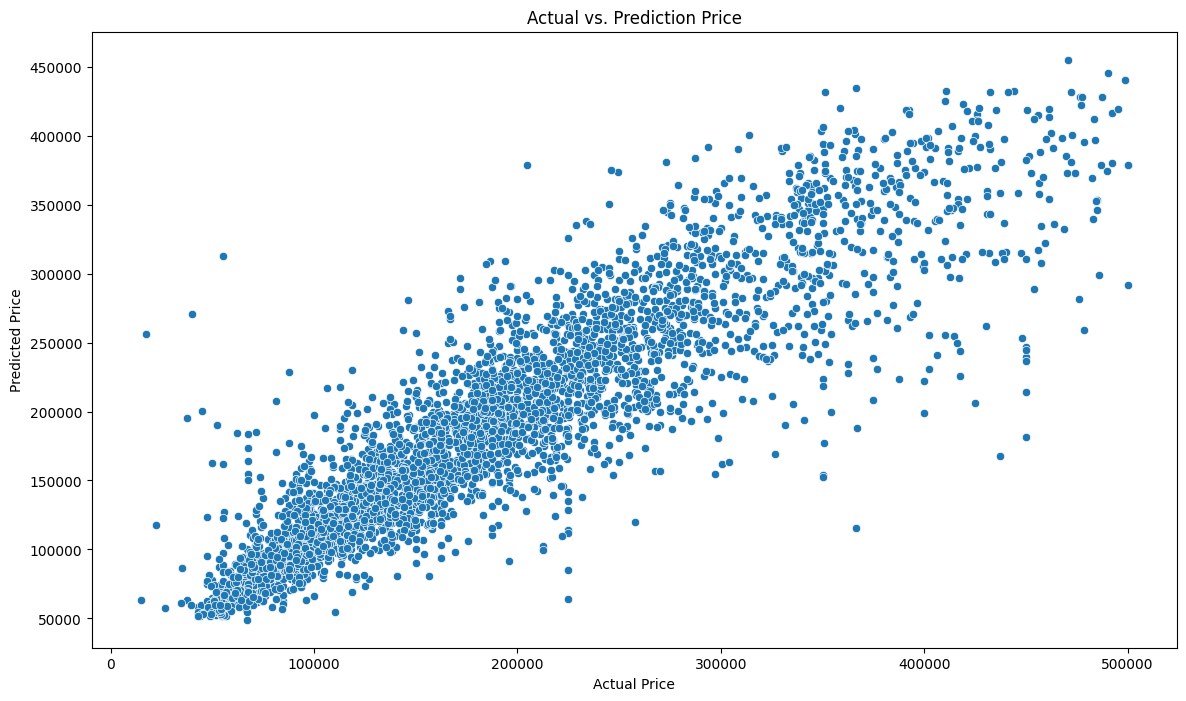

In [62]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_val, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (price), kita dapat mengeceknya melalui function feature_importances_.

In [73]:
transformer.transformers_

[('onehot',
  OneHotEncoder(drop='first', handle_unknown='ignore'),
  ['ocean_proximity']),
 ('imp_scal',
  Pipeline(steps=[('imputer', IterativeImputer()),
                  ('scaler', PowerTransformer(method='box-cox'))]),
  ['total_bedrooms', 'bedrooms_per_room']),
 ('scaler',
  PowerTransformer(method='box-cox'),
  ['housing_median_age',
   'total_rooms',
   'population',
   'households',
   'median_income',
   'rooms_per_household',
   'population_per_household']),
 ('remainder', 'passthrough', [0, 1])]

In [75]:
print(transformer.transformers_[0][1].get_feature_names_out())
print(transformer.transformers_[1][2])
print(transformer.transformers_[2][2])

['ocean_proximity_INLAND' 'ocean_proximity_ISLAND'
 'ocean_proximity_NEAR BAY' 'ocean_proximity_NEAR OCEAN']
['total_bedrooms', 'bedrooms_per_room']
['housing_median_age', 'total_rooms', 'population', 'households', 'median_income', 'rooms_per_household', 'population_per_household']


In [76]:
df_model.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [77]:
features = (list(transformer.transformers_[0][1].get_feature_names_out()) + 
                transformer.transformers_[1][2] + 
                transformer.transformers_[2][2] + 
                ['longitude','latitude'])

features

['ocean_proximity_INLAND',
 'ocean_proximity_ISLAND',
 'ocean_proximity_NEAR BAY',
 'ocean_proximity_NEAR OCEAN',
 'total_bedrooms',
 'bedrooms_per_room',
 'housing_median_age',
 'total_rooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'population_per_household',
 'longitude',
 'latitude']

In [78]:
len(features)

15

In [79]:
xgb_tuning

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['ocean_proximity']),
                                                 ('imp_scal',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer()),
                                                                  ('scaler',
                                                                   PowerTransformer(method='box-cox'))]),
                                                  ['total_bedrooms',
                                                   'bedrooms_per_room']),
                                                 ('scaler',
                                                  PowerTransformer(meth...
                              feature_types=None, gamma=5, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=8, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=119, n_jobs=None,
                              num_parallel_tree=None, random_state=1, ...))])

In [80]:
feature_importances = pd.DataFrame(data = xgb_tuning[1].feature_importances_, index = features, columns = ["coef"])
feature_importances.sort_values(by = ["coef"], ascending = False, inplace = True)
feature_importances

,coef
ocean_proximity_INLAND,0.515581
median_income,0.228675
population_per_household,0.048780
longitude,0.034218
latitude,0.033942
bedrooms_per_room,0.022003
ocean_proximity_NEAR OCEAN,0.021427
rooms_per_household,0.019805
housing_median_age,0.018678
households,0.014325


<Axes: >

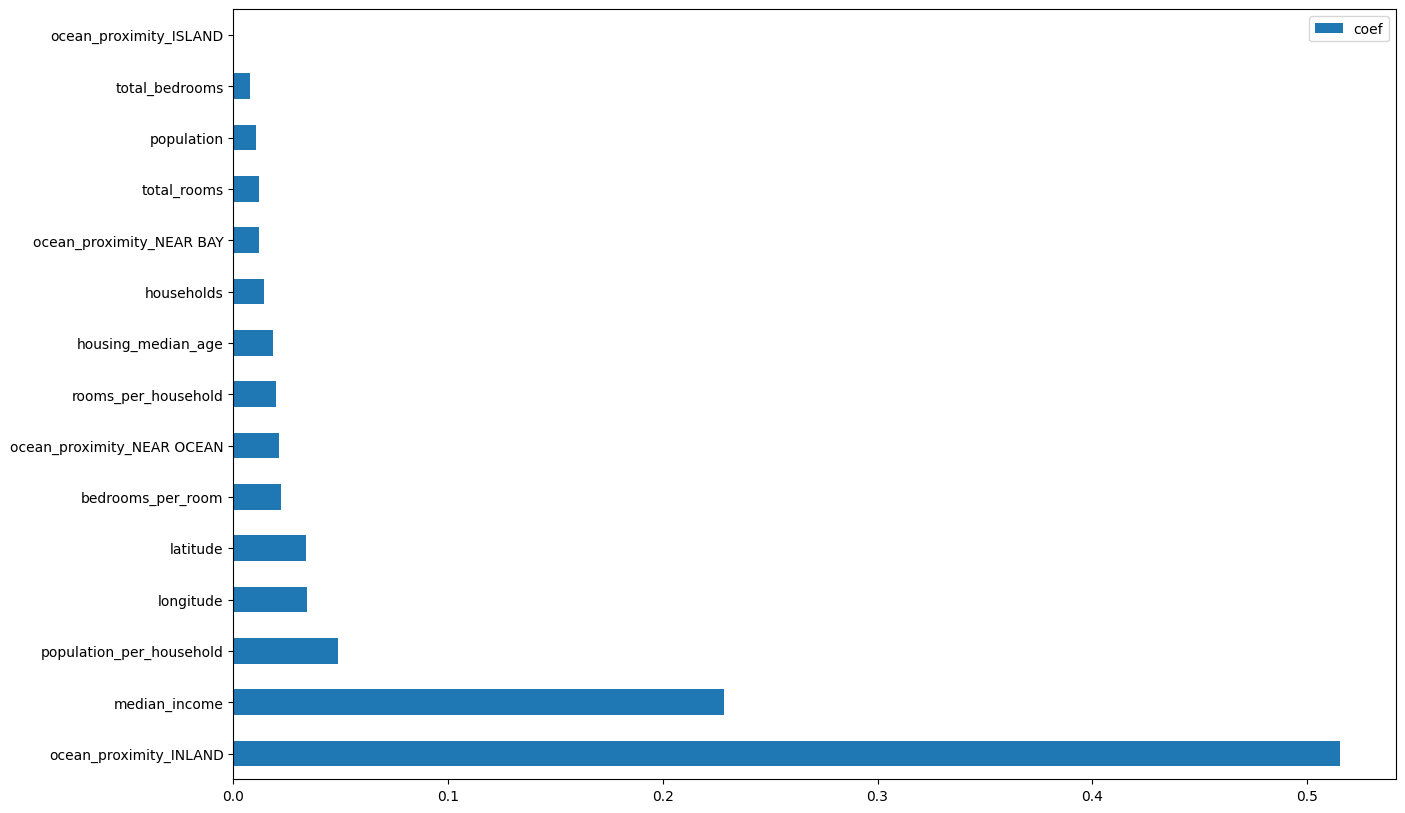

In [81]:
feature_importances.plot(kind = "barh", figsize = (15,10))

# **5. Kesimpulan**

Setelah melakukan pemodelan, dapat disimpulkan bahwa fitur **OceanProximity** dan **MedianIncome** menjadi fitur yang paling berpengaruh terhadap **median_house_value**.  
  
Memang permasalahan letak lokasi rumah merupakan suatu hal yang sangat krusial dalam menjual rumah dengan harga yang lebih rendah atau tinggi. Dalam dataset ini, terlihat bahwa rumah yang berada di kawasan pinggir dengan view laut atau oceanic view merupakan rumah yang paling mahal dibandingkan rumah di lokasi perkotaan/pedesaan.  
  
MedianIncome pun berdampak, dimana rata-rata penghasilan seseorang dalam suatu area akan menentukan harga rumah disekitarnya. Jika penghasilan seseorang semakin besar di daerah tersebut, maka secara otomatis pun harga rumah di daerah tersebut akan meningkat dan begitu juga vice versa.  
  
Jika dilihat berdasarkan metrics value nya, nilai pada RMSE cukup tinggi dikarenakan memiliki kelemahan yaitu RMSE tergantung oleh skala dari data, jadi semakin besar data maka RMSE pun akan semakin besar. RMSE juga dipengaruhi outliers, semakin banyak outliers maka RMSE akan semakin besar juga. Pada situasi dataset ini, terlihat bahwa outlier nya cukup banyak, dan apabila dihilangkan maka akan terjadi loss information yang banyak dan mungkin krusial pada data analysisnya.

# **6. Saran**

Hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi :

1. Penambahan fitur-fitur yang memiliki korelasi langsung dengan harga suatu rumah, misal luas rumah, fasilitas rumah, perusahaan developernya , dll.
<br><br>
2. Data perlu diperbaharui karena data yang digunakan merupakan data yang sudah lama yaitu tahun 1990. data ini tentu saja sudah sangat tidak relevan dengan kondisi pada saat ini. karena adanya faktor inflasi dan sebagainya.
<br><br>
3. Dari sisi modeling mungkin dapat ditingkatkan dengan metode hyperparameter yang lebih baik seperti gridsearch. metode gridsearch mencoba seluruh kombinasi hyperparameter. sedangkan pada randomized search yang kita gunakan dalam model tidak semua kombinasi hyperparameter dicoba tetapi kita memilih secara acak dari seluruh kemungkinan kombinasi.
<br><br>
4. Model ini dapat digunakan untuk prediksi harga perumahan yang memiliki fitur sejenis dengan dataset California house. Karena jika dilihat dari perbandingan nilai train dan test nya, performa model cukup stabil artinya model cenderung tidak overfitting/underfitting. Namun perlu diingat kembali bahwa data ini merupakan harga rumah di tahun 1990, yang tentu saja akan jauh berbeda dengan harga rumah di tahun sekarang, ini berkaitan dengan range harga harga yang akan diprediksi, karena jika range nya melewati atau diluar range harga dalam model, maka hasilnya akan menjadi bias

# **Save Model**

In [85]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Data_California_XGB.sav', 'wb'))

In [86]:
# Load model
filename = 'California_Housing_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [87]:
np.sqrt(mean_squared_error(y_val, loaded_model.predict(X_val)))

42874.38637406449